In [ ]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Activation
from keras import optimizers

from PIL import Image
from tensorflow.keras.preprocessing import image

In [ ]:
# Download MINST
(x_train,x_test), (y_train,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Print shape
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# For prediction image
prediction_img = y_train

# Data pre-processing
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255
y_train = y_train.reshape(-1,28,28,1).astype('float32')/255

x_test = to_categorical(x_test)
y_test = to_categorical(y_test)

In [ ]:
LR_function=ReduceLROnPlateau(monitor='val_accuracy',
                patience=5,  # 5 epochs 內acc沒下降就要調整LR
                verbose=1,
                factor=0.5, # LR降為0.5
                min_lr=1e-8 # 最小 LR 到1e-8就不再下降     
                )                                    

In [ ]:
# Build neural network
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(x_train, x_test, validation_data=(y_train,y_test), callbacks=[LR_function], verbose=2, epochs=100)

Epoch 1/100
1875/1875 - 24s - loss: 0.2505 - accuracy: 0.9233 - val_loss: 0.0507 - val_accuracy: 0.9834 - lr: 0.0010 - 24s/epoch - 13ms/step
Epoch 2/100
1875/1875 - 7s - loss: 0.1217 - accuracy: 0.9636 - val_loss: 0.0408 - val_accuracy: 0.9872 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 3/100
1875/1875 - 6s - loss: 0.0934 - accuracy: 0.9727 - val_loss: 0.0323 - val_accuracy: 0.9889 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 4/100
1875/1875 - 7s - loss: 0.0772 - accuracy: 0.9768 - val_loss: 0.0333 - val_accuracy: 0.9887 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 5/100
1875/1875 - 6s - loss: 0.0649 - accuracy: 0.9810 - val_loss: 0.0353 - val_accuracy: 0.9882 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 7s - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.0233 - val_accuracy: 0.9919 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0252 - val_accuracy: 0.9920 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 7s - lo

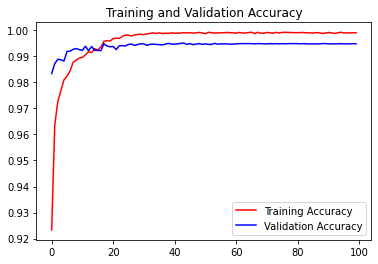

Final Accuracy : 0.9990166425704956.
Final validation accuracy : 0.9947999715805054.


In [ ]:
epochs=range(100)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'r-',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

print(f"Final Accuracy : {acc[-1]}.")
print(f"Final validation accuracy : {val_acc[-1]}.")

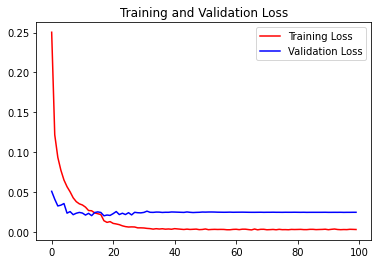

Final loss : 0.0027444360312074423.
Final validation loss : 0.024370549246668816.


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,loss,'r-',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

print(f"Final loss : {loss[-1]}.")
print(f"Final validation loss : {val_loss[-1]}.")

#Prediction

7


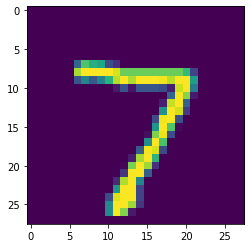

In [ ]:
x = image.img_to_array(prediction_img[0].astype('float32')/255)
x = np.expand_dims(x, axis=0)
print(np.argmax(model.predict(x)))

# Show image
plt.imshow(prediction_img[0], interpolation='nearest')
plt.show()